# Association rules

# Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data frame 'book.csv'
df = pd.read_csv('book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
# The data set containing binary value 0 and 1

# DO EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# There are no null values

# Apriori Algorithm

# Create frequent items

In [7]:
# Set a minimum threshold of support to filter the frequent itemsets from all the itemsets.

In [49]:
# create frequent itemsets with min support of 0.10
freq_item_ap = apriori(df,min_support = 0.10,use_colnames=True)
freq_item_ap

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


# F-P GrowAth Algorithm

In [22]:
from mlxtend.frequent_patterns import fpgrowth

In [23]:
freq_item_fp = fpgrowth(df,min_support = 0.10,use_colnames=True)
freq_item_fp

,support,itemsets
0,0.2820,(DoItYBks)
1,0.2760,(GeogBks)
2,0.2475,(YouthBks)
3,0.4230,(ChildBks)
4,0.4310,(CookBks)
5,0.2145,(RefBks)
6,0.2410,(ArtBks)
7,0.1085,(Florence)
8,0.1135,(ItalCook)
9,0.1840,"(DoItYBks, ChildBks)"


In [24]:
# with 80% confidence
rules_ap=association_rules(freq_item_ap,metric='lift',min_threshold=0.8)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [40]:
rules_ap[rules_ap['confidence']>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
53,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
54,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
83,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
89,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


In [42]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules_final = rules_ap[rules_ap.lift>1]

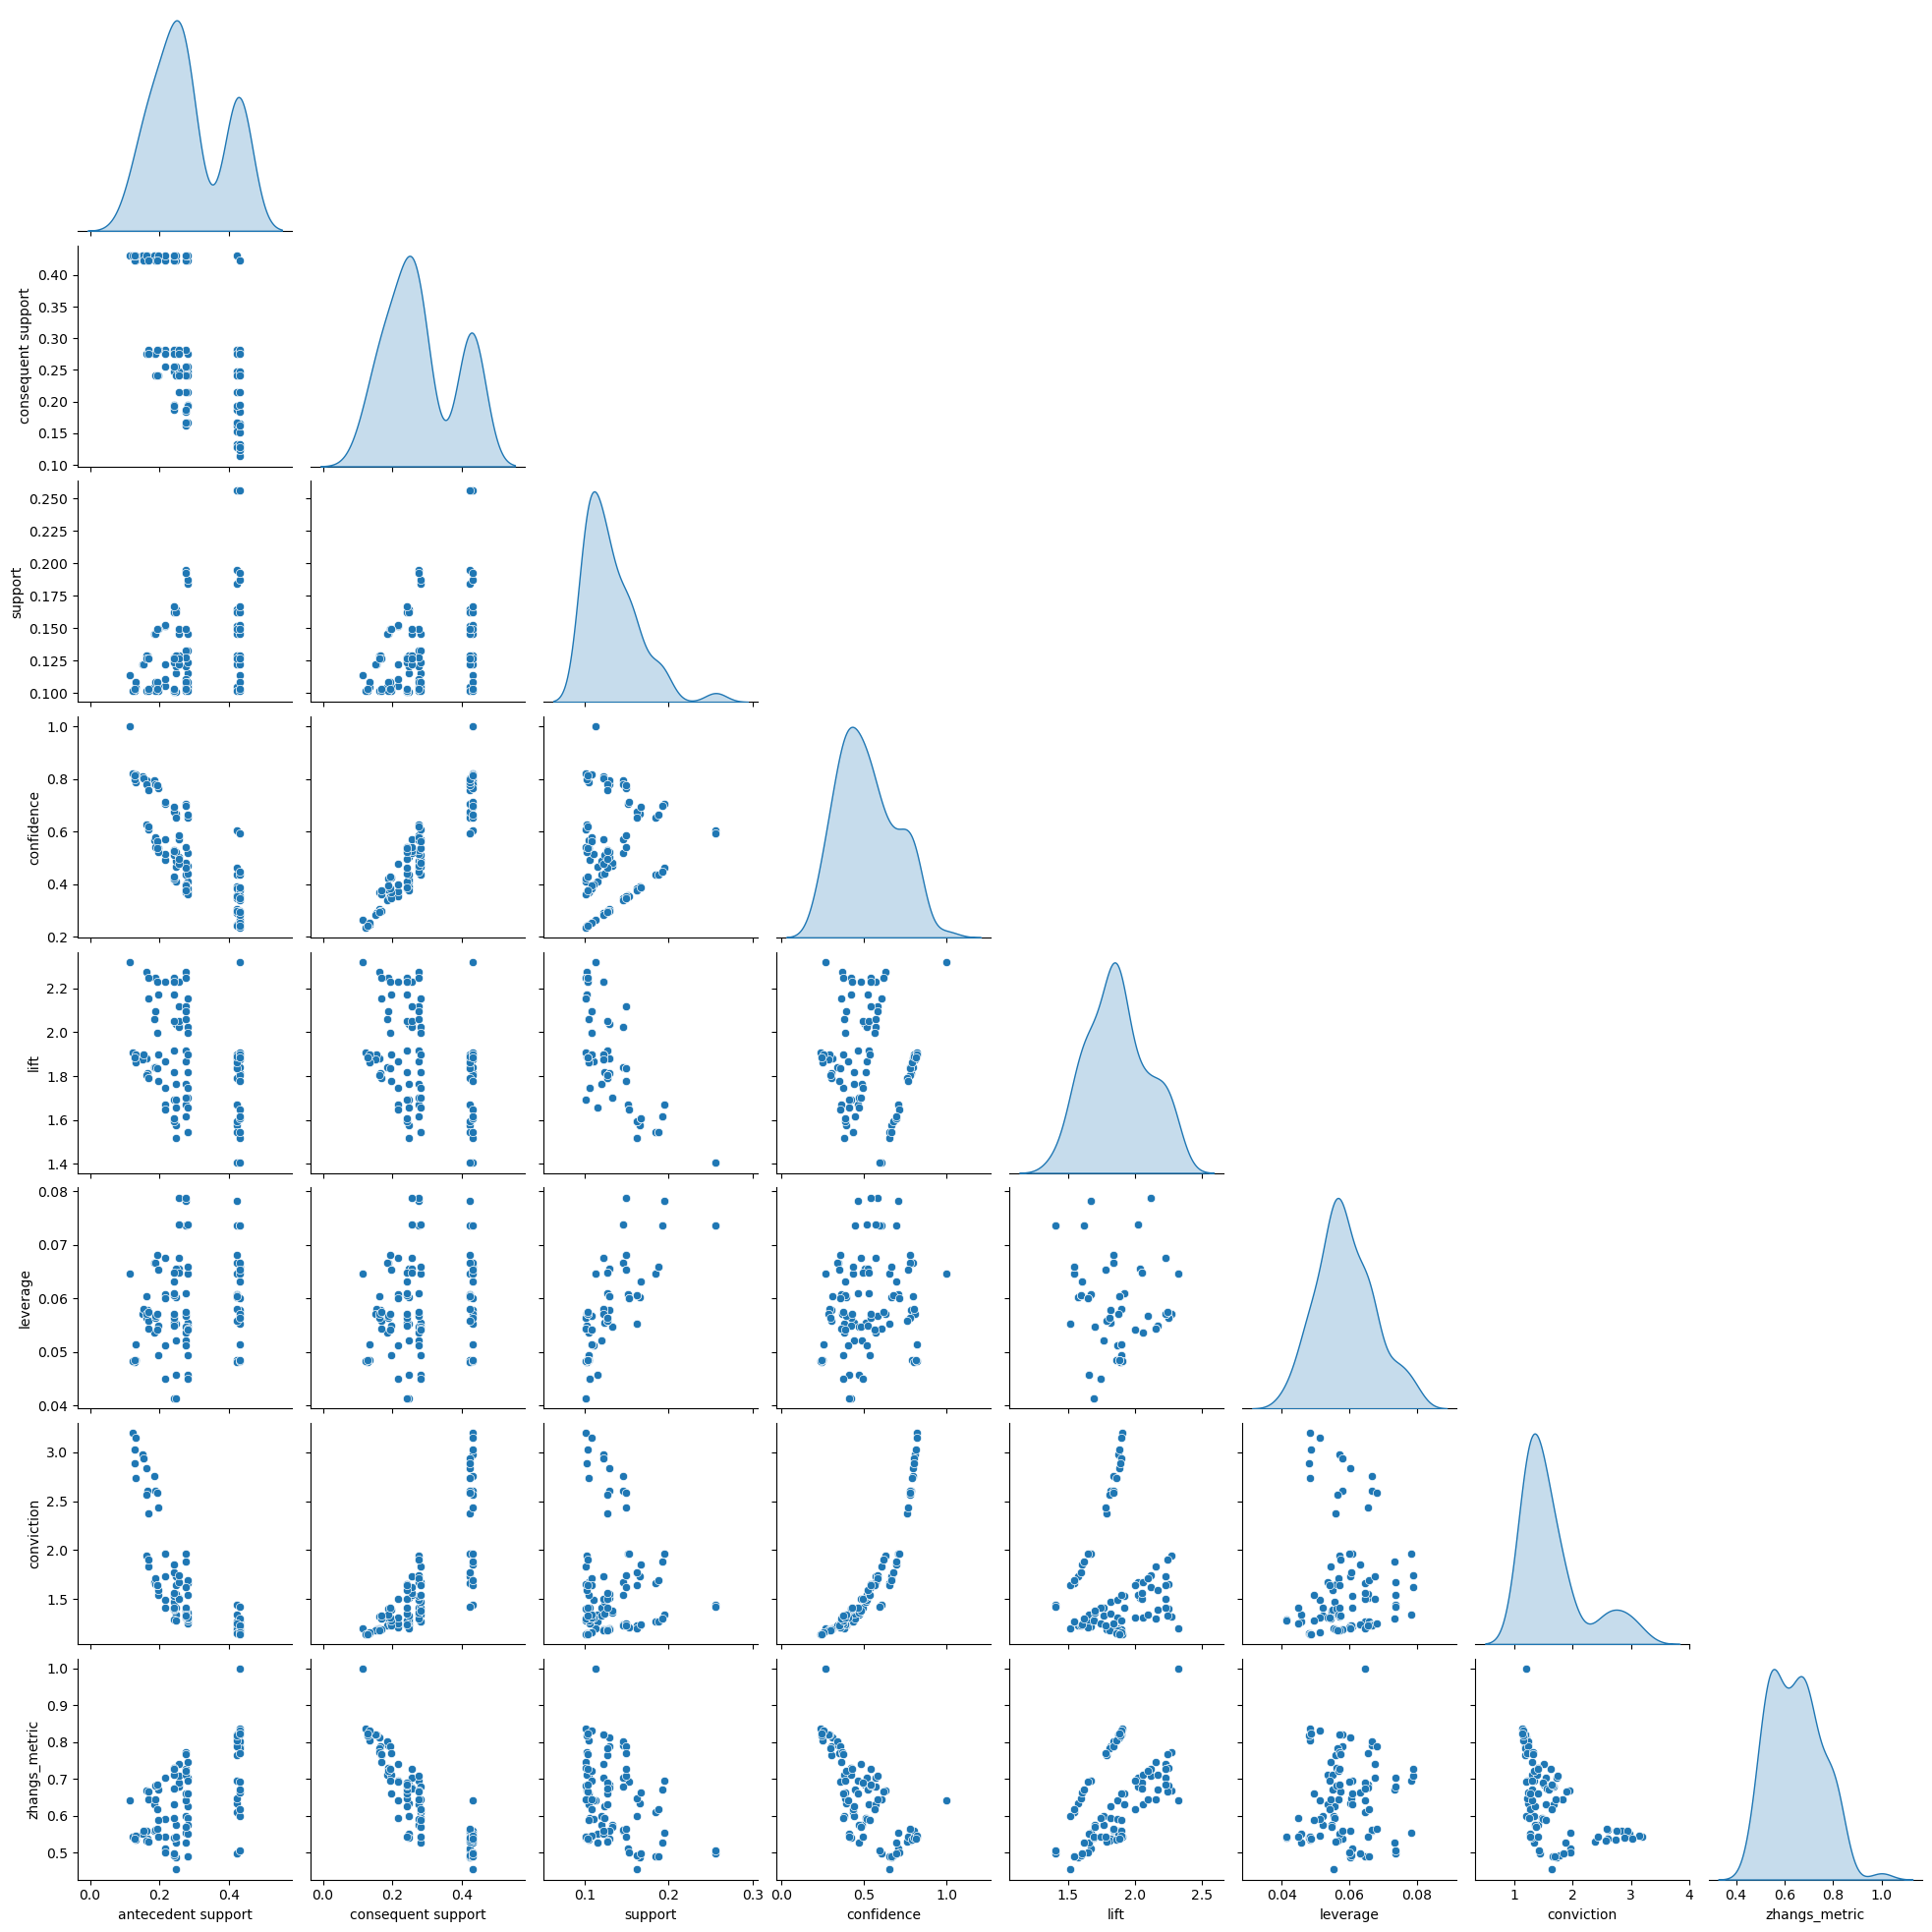

In [43]:
sns.pairplot(data =rules_final,diag_kind = 'kde',corner = True);

In [28]:
# create frequent itemsets with min support of 0.15
freq_item_ap1 = apriori(df,min_support = 0.15,use_colnames=True)
freq_item_ap1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [33]:
# with 85% confidence
rules_ap1=association_rules(freq_item_ap1,metric='lift',min_threshold=0.85)
rules_ap1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


In [37]:
rules_ap1[rules_ap1['confidence']>0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
11,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
17,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303


In [44]:
# If Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules_final1 = rules_ap1[rules_ap1.lift>1]

In [45]:
rules_final1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


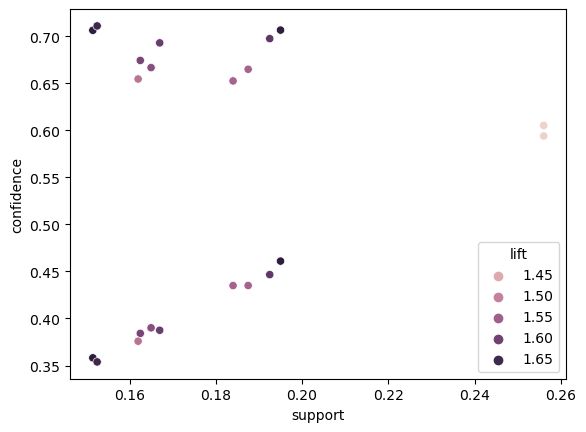

In [47]:
sns.scatterplot(rules_final1, x = 'support', y = 'confidence', hue = 'lift');

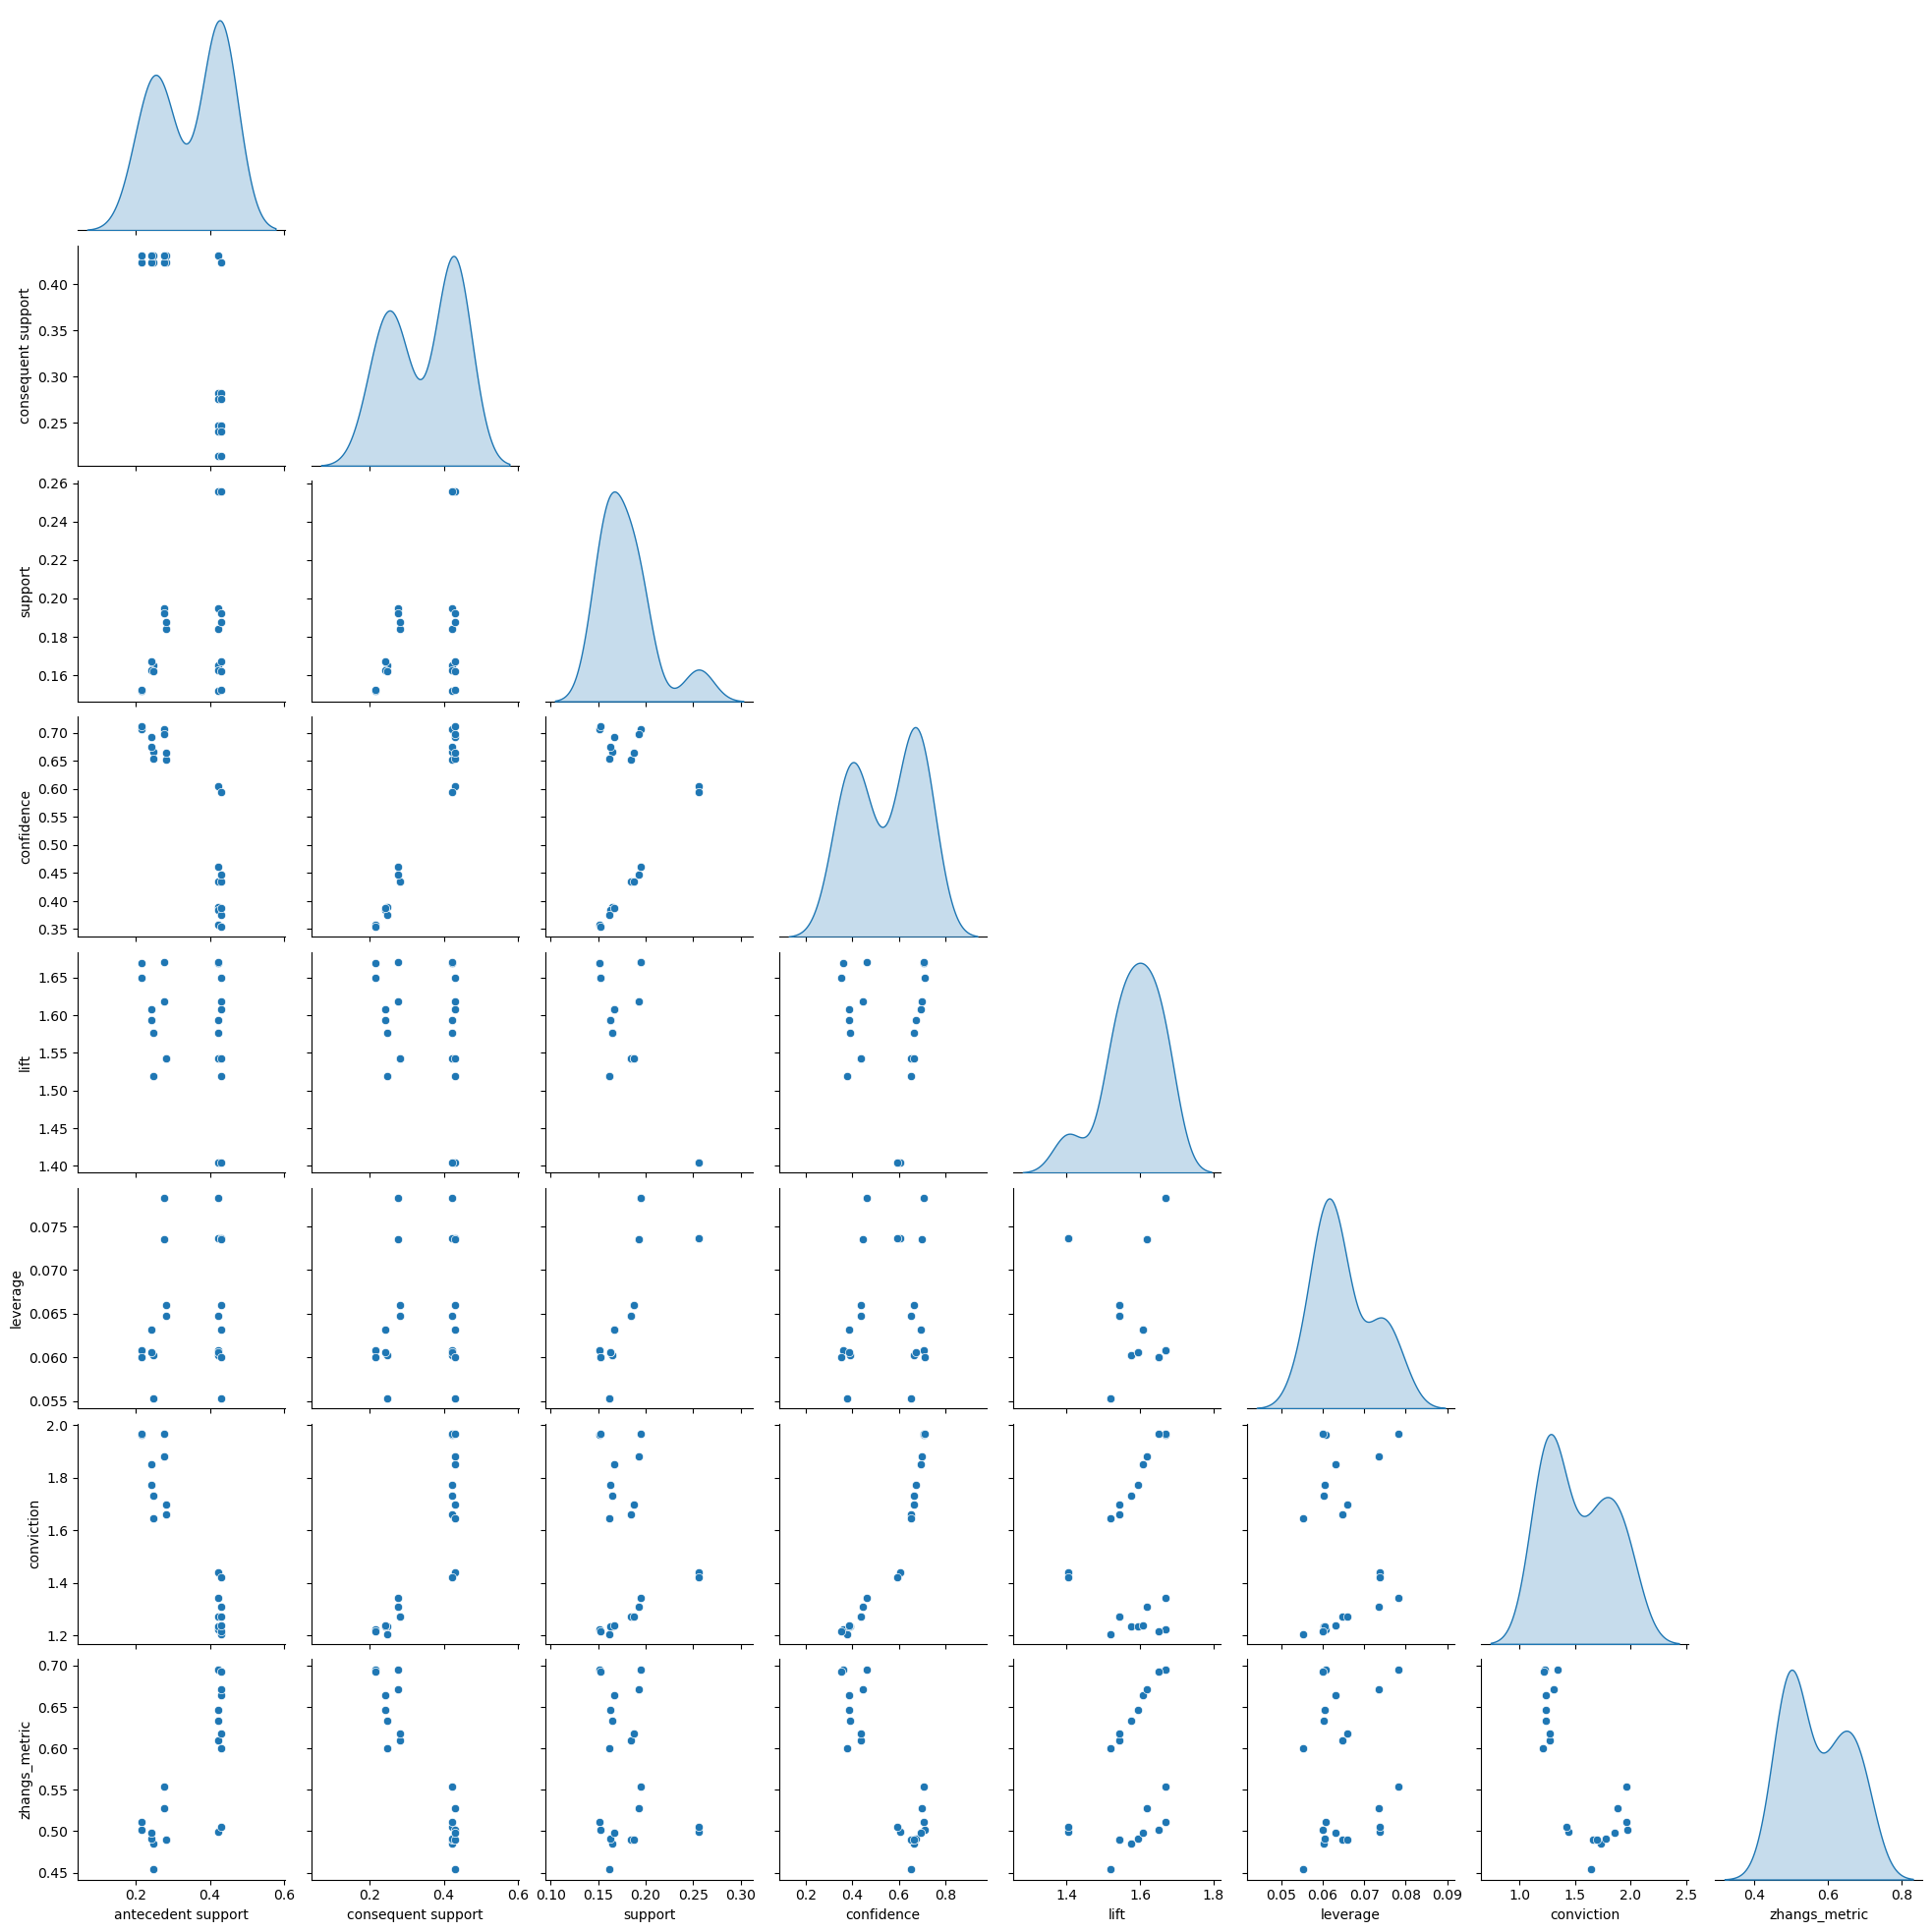

In [46]:
sns.pairplot(data =rules_final1,diag_kind = 'kde',corner = True);

# For movies data set for min_support 10% and 80% confidence the number of rules are more and for 15% min_support , 85% confidence  the number of rules are less 

# 